# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [39]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [74]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)     # 157.0

# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)    # 235.0

235.0

In [83]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

Mean of white ppl getting calls 0.09650924056768417
Mean of Black ppl getting calls 0.0644763857126236
Standard Dev. white 0.29528486728668213
Standard Dev. black 0.24559901654720306


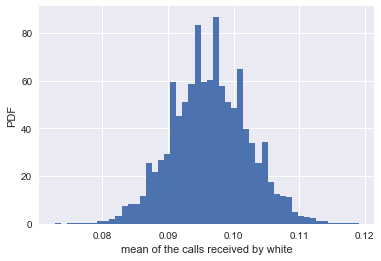

Std.Error mean. white 0.0059840016981803105
Std.Error mean. black 0.004977108869798699
Std.Deviation of replicates. white 0.005837035372441806
Std.Deviation of replicates. black 0.004930852759785639


' Standard deviation of calls received by the white and black ppl are almost equal to their respective standard error means (generated by bootstrap replicates). This proves to CLT applies to this data. Moreover, as were able to generate bootstrap replicates, we will be able to further check the confidence intervals and null hypothesis testing can be carried out on this data.'

In [76]:
w = data[data.race=='w']
b = data[data.race=='b']

w_array = np.array(w.call)
b_array = np.array(b.call)

w_mean = np.mean(w.call)
b_mean = np.mean(b.call)
print('Mean of white ppl getting calls', w_mean )
print('Mean of Black ppl getting calls', b_mean)

w_std = np.std(w.call)
b_std = np.std(b.call)
print('Standard Dev. white', w_std)
print('Standard Dev. black', b_std)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

""" Upon checking the mean, it looks like the white sounding names are getting more call backs than their black counterparts"""
# We can generate bootstrap replicates of the mean and SEM (standard error mean) to verify whether the PDF when plotted as a histogram is NORMAL

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates_white = draw_bs_reps(w_array,np.mean,10000)
bs_replicates_black = draw_bs_reps(b_array,np.mean,10000)

sns.set()
# Make a histogram of the results
_ = plt.hist(bs_replicates_white,bins=50, normed=True)
_ = plt.xlabel('mean of the calls received by white')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


w_sem = np.std(w.call) / np.sqrt(len(w.call))
b_sem = np.std(b.call) / np.sqrt(len(b.call))
print('Std.Error mean. white', w_sem)
print('Std.Error mean. black', b_sem)

bs_std_white = np.std(bs_replicates_white)
bs_std_black = np.std(bs_replicates_black)
print('Std.Deviation of replicates. white', bs_std_white)
print('Std.Deviation of replicates. black', bs_std_black)

""" Standard deviation of calls received by the white and black ppl are almost equal to their respective standard error means (generated by bootstrap replicates). This proves to CLT applies to this data. Moreover, as were able to generate bootstrap replicates, we will be able to further check the confidence intervals and null hypothesis testing can be carried out on this data."""

In [77]:
# Your solution to Q3 here
#############################
# Combine the Black and White calls before drawing random data
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
#############################
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates
#############################
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff
#############################
""" Test Hypothesis - whether race has a significant impact on the rate of callbacks for resumes  """
""" Test Statistic - Difference in Means """
#############################
"""Bootstrap replicates Hypothesis testing."""
actual_diff_mean = diff_of_means(w_array,b_array)
# Draw 10,000 permutation replicates: perm_replicates
observed_repl_mean = draw_perm_reps(w_array,b_array,
                                 diff_of_means, size=10000)
p_bootHyp = np.sum(observed_repl_mean >= actual_diff_mean) / len(observed_repl_mean)
print('p_bootHyp = ', p_bootHyp )

"""Bootstrap hypothesis for Identical distributions - 
Shift the mean of calls received by black people towards the white mean and conduct hypothesis testing to find P value."""
translated_mean = np.mean(w_array) + (b_array - np.mean(b_array))

# Take bootstrap replicates of Translated calls: bs_replicates
bs_replicates = draw_bs_reps(translated_mean, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p_shifted = np.sum(bs_replicates <= np.mean(b_array)) / len(bs_replicates)

# Print the p-value
print('p_shifted = ', p_shifted )

#############################
# Compute the 95% confidence interval: conf_int
conf_int_white = np.percentile(bs_replicates_white,[2.5,97.5])
print('95% confidence interval for calls received by white ppl is: ', conf_int_white)

conf_int_black = np.percentile(bs_replicates_black,[2.5,97.5])
print('95% confidence interval for calls received by black ppl is: ', conf_int_black)
#############################

p_bootHyp =  0.0001
p_shifted =  0.0
95% confidence interval for calls received by white ppl is:  [0.08501027 0.10800821]
95% confidence interval for calls received by black ppl is:  [0.0550308  0.07433265]


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>


### Conclusion - Data Story
Mean of calls received by white named resumes are nearly double than the black named resumes. Also, 
Standard deviation of calls received by the white and black ppl are almost equal to their respective standard error means (generated by bootstrap replicates). This proves to CLT applies to this data.

P Values obtained by Bootstrap hypothesis and Shifted mean techniques both suggest that there are zero replicates 
that were as extreme as actual difference in means. This proves that RACE has significant impact on the callback of resumes and it is not by chance.


Clearly the confidence intervals of calls received by White named resume and black ones do not overlap each other and are completely out of range.
This again suggests the fact that RACE is playing a significant role in resume selection/ calls from Recruiters

Therefore, we conclude that RACE plays a significant role in Resume selection / receiving calls from recruiters based on the available data.